In [1]:
training_file = 'datasets/deml_dataset.csv'
delimiter = ','
comp_col = 'composition'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
import itertools
import pandas as pd
import matminer
import sys
sys.path.append("/Users/Ashwin/Desktop/git/matminer")
from pymatgen import Composition, Element
from matminer.descriptors.composition_features import ElementFractionAttribute
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import datasets
from sklearn import svm
import datetime
from sklearn.multiclass import OneVsRestClassifier
%matplotlib inline

In [3]:
def load_training_set(files, sep):
    if type(files) is not list:
        training_set = pd.read_csv(files, sep=sep)
    else:
        training_set = pd.DataFrame()
        for i in range(len(files)):
            training_set.append(pd.read_csv(files[i], sep=sep[i]))
    
    return training_set

training_set = load_training_set(training_file, delimiter)

# Create PyMatGen Composition Objects

In [4]:
comp_objects = [Composition(comp) for comp in training_set[comp_col]]
training_set = training_set.assign(comp_obj=comp_objects)
training_set

,composition,delta_e,comp_obj
0,As1Y1,-1.555732,"(As, Y)"
1,Ga1P1,-0.534169,"(Ga, P)"
2,Ga2Mg1S4,-1.068504,"(Ga, Mg, S)"
3,Cd4K1O12V3,-1.968765,"(Cd, K, O, V)"
4,Al1Ca1Fe1Na1O12Si4,-2.949067,"(Al, Ca, Fe, Na, O, Si)"
5,Hf1O3Pb1,-2.830320,"(Hf, O, Pb)"
6,Al2Ba2Co1F14Mn1,-3.488390,"(Al, Ba, Co, F, Mn)"
7,Ba2Cd1F14Fe2Mn1,-3.007836,"(Ba, Cd, F, Fe, Mn)"
8,Be2O4Si1,-3.020793,"(Be, O, Si)"
9,Ba2Ca1Cu1F14Ga2,-3.325601,"(Ba, Ca, Cu, F, Ga)"


## Compute element fraction descriptors with MatMiner

In [5]:
%%time

def calc_attributes(training_set):
    not_attr = list(training_set)
    training_set_updated = ElementFractionAttribute().featurize_dataframe(training_set, col_id='comp_obj')
    all_cols = list(training_set_updated)
    attr_names = [col for col in all_cols if col not in not_attr]
    return training_set_updated, attr_names
all_desc, attr_names = calc_attributes(training_set)
np.shape(all_desc)

CPU times: user 246 ms, sys: 8.5 ms, total: 254 ms
Wall time: 254 ms


## Predicting formation energy

In [6]:
#Drop invalid rows from training_set

training_set_use = all_desc.replace("None", np.nan)
training_set_use.replace(np.inf, np.nan, inplace=True)
training_set_use.dropna(inplace=True)

np.shape(training_set_use)

(2338, 106)

In [7]:
#Discretize into pos/neg formation energy for classification

delta_e = np.array(training_set_use['delta_e'], dtype=float)

energy_range = np.zeros(np.shape(delta_e), dtype=str)
for i in range(len(delta_e)):
    if delta_e[i] < 0:
        energy_range[i] = 'neg'
    else:
        energy_range[i] = 'pos'

print(energy_range)

['n' 'n' 'n' ..., 'p' 'n' 'n']


## ML Models + KFold Cross Validation

In [8]:
from sklearn.model_selection import ShuffleSplit
def shuffle_split_cross_val(model, samples, n_splits=10, test_size=0.3):
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state = 0)
    scores = cross_val_score(model, training_set_use[attr_names], samples, cv=cv)
    print("Average Accuracy: ", scores.mean(), ". Standard Deviation: ", scores.std())

### Random Forest Classifier

In [9]:
%%time
#Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2)
rfc.fit(training_set_use[attr_names], energy_range)
rfc_prediction = rfc.predict(training_set_use[attr_names])

CPU times: user 41.6 ms, sys: 3 ms, total: 44.6 ms
Wall time: 55.2 ms


In [10]:
pd.crosstab(energy_range, rfc_prediction, rownames=['actual'], colnames=['predicted'])

predicted,n,p
actual,,
n,2323,0
p,4,11


In [11]:
%%time
shuffle_split_cross_val(rfc, energy_range)

Average Accuracy:  0.992877492877 . Standard Deviation:  0.00305521518369
CPU times: user 278 ms, sys: 9.74 ms, total: 288 ms
Wall time: 291 ms


### Decision Tree Classifier

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(training_set_use[attr_names], energy_range)
dtc_prediction = dtc.predict(training_set_use[attr_names])

In [13]:
pd.crosstab(energy_range, dtc_prediction, rownames=["actual"], colnames=["predicted"])

predicted,n,p
actual,,
n,2323,0
p,0,15


In [14]:
%%time
shuffle_split_cross_val(dtc, energy_range)

Average Accuracy:  0.989601139601 . Standard Deviation:  0.00292283255394
CPU times: user 89.3 ms, sys: 2.88 ms, total: 92.2 ms
Wall time: 91.2 ms


### Random Forest Regressor

In [15]:
rf_model = RandomForestRegressor()
rf_model.fit(training_set_use[attr_names], delta_e)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [16]:
rf_prediction = rf_model.predict(training_set_use[attr_names])

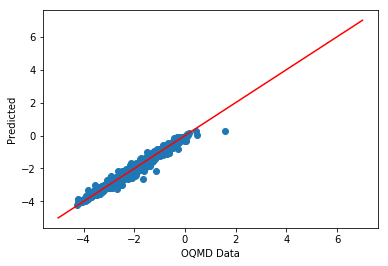

In [17]:
plt.scatter(delta_e, rf_prediction)
plt.plot(range(-5,8), range(-5,8), 'r')
plt.xlabel("OQMD Data")
plt.ylabel("Predicted")

In [18]:
%%time
shuffle_split_cross_val(rf_model, delta_e)

Average Accuracy:  0.93791431459 . Standard Deviation:  0.00780321965523
CPU times: user 1.08 s, sys: 11.9 ms, total: 1.1 s
Wall time: 1.1 s


### Decision Forest Regressor

In [19]:
dt_model = DecisionTreeRegressor()
dt_model.fit(training_set_use[attr_names], delta_e)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [20]:
dt_prediction = dt_model.predict(training_set_use[attr_names])

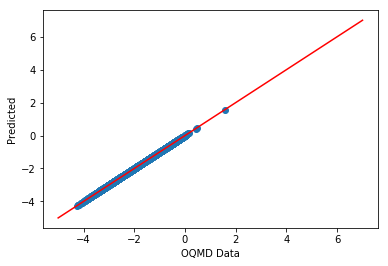

In [21]:
plt.scatter(delta_e, dt_prediction)
plt.plot(range(-5,8), range(-5,8), 'r')
plt.xlabel("OQMD Data")
plt.ylabel("Predicted")

In [22]:
%%time
shuffle_split_cross_val(dt_model, delta_e)

Average Accuracy:  0.902463748738 . Standard Deviation:  0.0094182670996
CPU times: user 181 ms, sys: 5.32 ms, total: 186 ms
Wall time: 188 ms


# Split Dataset by Element for Aluminum

In [23]:
cols_to_drop = ['comp', 'energy_pa', 'volume_pa', 'magmom_pa', 'bandgap', 'stability', 'comp_obj', 'is_groundstate', 'delta_e']

In [24]:
def get_elements(comp):
    return comp.elements

def split_by_element(training_set, element):
    """
    Splits dataframe into two datasets: one without the element inputted and the other with. Provides datasets for machine learning models.
    
    Args:
        training_set: pandas data frame containing training data
        element: string represenation of an element
    Returns:
        Two dataframes -- one with compounds with the element in it, the other without
    """
    #print(training_set.head())
    #for comp in training_set['comp_obj']:
        #if Element(element) in comp.elements:
        
    training_set['els'] = training_set['comp_obj'].apply(get_elements)
    training_set['is_in'] = False
    for count, el_list in enumerate(training_set['els']):
        if Element(element) in el_list:
            training_set.iloc[count, training_set.columns.get_loc('is_in')] = True
    
    with_element = training_set[training_set['is_in']]
    without_element = training_set[training_set['is_in'] == False]
    return with_element, without_element

In [25]:
%%time
#Predict Enthalpy Delta given training data without Aluminum in it
with_, without = split_by_element(training_set_use, 'Al')

CPU times: user 93.6 ms, sys: 3.79 ms, total: 97.4 ms
Wall time: 98.5 ms


In [26]:
cols_to_drop += ['els', 'is_in']

In [27]:
def create_ranges(without, with_):
    # Training data

    #Discrete into pos/neg formation energy for regression
    delta_e_without = np.array(without['delta_e'], dtype=float)
    #pos/neg values for classification
    energy_range_without = np.zeros(np.shape(delta_e_without), dtype=str)
    for i in range(len(delta_e_without)):
        if delta_e_without[i] < 0:
            energy_range_without[i] = 'neg'
        else:
            energy_range_without[i] = 'pos'

    # Prediction data
    delta_e_with = np.array(with_['delta_e'], dtype=float)
    energy_range_with = np.zeros(np.shape(delta_e_with), dtype=str)
    for i in range(len(delta_e_with)):
        if delta_e_with[i] < 0:
            energy_range_with[i] = 'neg'
        else:
            energy_range_with[i] = 'pos'
            
    return delta_e_without, energy_range_without, delta_e_with, energy_range_with

In [28]:
delta_e_without, energy_range_without, delta_e_with, energy_range_with = create_ranges(without, with_)

## Classification on All Elements

In [29]:
def all_el_split(method):
    """
    Takes a machine learning model, then uses the split element test to fill a dataframe with r1 and r2 values for each element
    """
    index = ['r1', 'r2']
    stats = pd.DataFrame(index=index)
    for i in range(1, 104):
        el = Element.from_Z(i).symbol
        print(el)
        # creates two dataframes, with the element in it and without the element in it
        with_, without = split_by_element(training_set_use, el)
        # will reiterate if there are no compositions with the selected element
        if with_.shape[0] == 0:
            continue
        # creates classification data: trains with delta_e_without and energy_range_without; predicts with delta_e_with
        delta_e_without, energy_range_without, delta_e_with, energy_range_with = create_ranges(without, with_)
        r1, r2 = method(without, with_, energy_range_without, energy_range_with)
        arr = [r1, r2]
        stats[el] = pd.Series(arr).values 
        
    return stats

In [30]:
without[attr_names].head()

,Ac,Ag,Al,Am,Ar,As,At,Au,B,Ba,...,Tl,Tm,U,V,W,Xe,Y,Yb,Zn,Zr
0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.5,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


### Random Forest Classifier

In [31]:
import math
def rfc(without, with_, energy_range_without, energy_range_with):
    """
    Returns r1 score and r2 score
    """
    
    rfc = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, n_jobs=-1)
    rfc.fit(without[attr_names], energy_range_without)
    rfc_prediction = rfc.predict(with_[attr_names])
    r2_score = rfc.score(with_[attr_names], energy_range_with)
    r1_score = math.sqrt(r2_score)
    #print(pd.crosstab(energy_range_with, rfc_prediction, rownames=['actual'], colnames=['predicted']))
    print(r1_score)
    return r1_score, r2_score


In [32]:
%%time
rfc_stats = all_el_split(rfc)

H
He


Li
Be


1.0
B
C
N


0.9660917830792959
O


1.0
F


1.0
Ne
Na


0.9986062710997091
Mg


1.0
Al


1.0
Si


0.997997995989972
P


1.0
S


1.0
Cl


1.0
Ar
K


0.9986868017972349
Ca


1.0
Sc


1.0
Ti


1.0
V


1.0
Cr


0.9920947376656813
Mn


0.9973924336321519
Fe


0.9946666286387915
Co


1.0
Ni


1.0
Cu


1.0
Zn


0.9941348467724344
Ga


1.0
Ge


0.9972489631508746
As


0.9917011013305195
Se


1.0
Br
Kr
Rb


1.0
Sr


1.0
Y


1.0
Zr


1.0
Nb


1.0
Mo


1.0
Tc
Ru
Rh
Pd
Ag


0.9900823995480057
Cd


0.9965217285917832
In


1.0
Sn


0.996747958867483
Sb


0.9710083124552245
Te


0.9853292781642932
I
Xe
Cs
Ba


1.0
La
Ce
Pr
Nd
Pm
Sm
Eu
Gd
Tb
Dy
Ho
Er


Tm
Yb
Lu
Hf


1.0
Ta
W
Re
Os
Ir
Pt
Au


0.9649012813540153
Hg


1.0
Tl
Pb


1.0
Bi
Po
At
Rn
Fr
Ra
Ac
Th


Pa
U
Np
Pu
Am
Cm
Bk
Cf
Es
Fm
Md
No


Lr
CPU times: user 23.6 s, sys: 2.59 s, total: 26.2 s
Wall time: 29.7 s


In [33]:
rfc_stats

,Be,N,O,F,Na,Mg,Al,Si,P,S,...,Cd,In,Sn,Sb,Te,Ba,Hf,Au,Hg,Pb
r1,1.0,0.966092,1.0,1.0,0.998606,1.0,1.0,0.997998,1.0,1.0,...,0.996522,1.0,0.996748,0.971008,0.985329,1.0,1.0,0.964901,1.0,1.0
r2,1.0,0.933333,1.0,1.0,0.997214,1.0,1.0,0.996000,1.0,1.0,...,0.993056,1.0,0.993506,0.942857,0.970874,1.0,1.0,0.931034,1.0,1.0


In [34]:
rfc_stats.T['r2'].describe()

count    44.000000
mean      0.992505
std       0.016831
min       0.931034
25%       0.994256
50%       1.000000
75%       1.000000
max       1.000000
Name: r2, dtype: float64

### Decision Forest Classifier

In [35]:
def dtc(without, with_, energy_range_without, energy_range_with):
    dtc = DecisionTreeClassifier()
    dtc.fit(without[attr_names], energy_range_without)
    dtc_prediction = dtc.predict(with_[attr_names])
    r2_score = dtc.score(with_[attr_names], energy_range_with)
    r1_score = math.sqrt(r2_score)
    #print(pd.crosstab(energy_range_with, dtc_prediction, rownames=['actual'], colnames=['predicted']))
    print(r1_score)
    return r1_score, r2_score

In [36]:
%%time
dfc_stats = all_el_split(dtc)

H
He
Li
Be


1.0
B
C
N


0.9660917830792959

O
0.9994891442833921
F
1.0
Ne
Na


0.9986062710997091
Mg
1.0
Al
1.0


Si
0.997997995989972
P
0.9895285072531598
S
1.0
Cl


1.0
Ar
K


0.9986868017972349
Ca
1.0
Sc
1.0
Ti
1.0


V
1.0
Cr
0.9920947376656813
Mn
0.9973924336321519
Fe


0.9946666286387915
Co
1.0
Ni
1.0
Cu


1.0
Zn
0.9941348467724344
Ga
1.0


Ge
0.9972489631508746
As
0.9917011013305195
Se
1.0


Br
Kr
Rb
1.0
Sr


1.0
Y
1.0
Zr
1.0
Nb


1.0
Mo
1.0
Tc
Ru
Rh
Pd
Ag


0.9900823995480057
Cd
0.9965217285917832
In
1.0
Sn


0.996747958867483
Sb
0.9710083124552245
Te
0.9853292781642932
I
Xe
Cs
Ba


1.0
La
Ce
Pr
Nd
Pm
Sm
Eu
Gd
Tb
Dy
Ho


Er
Tm
Yb
Lu
Hf
1.0
Ta
W
Re
Os


Ir
Pt
Au
0.9649012813540153
Hg
1.0
Tl
Pb


1.0
Bi
Po
At
Rn
Fr
Ra
Ac
Th
Pa
U
Np


Pu
Am
Cm
Bk
Cf
Es
Fm
Md
No
Lr
CPU times: user 5.95 s, sys: 230 ms, total: 6.18 s
Wall time: 6.08 s


In [37]:
dfc_stats

,Be,N,O,F,Na,Mg,Al,Si,P,S,...,Cd,In,Sn,Sb,Te,Ba,Hf,Au,Hg,Pb
r1,1.0,0.966092,0.999489,1.0,0.998606,1.0,1.0,0.997998,0.989529,1.0,...,0.996522,1.0,0.996748,0.971008,0.985329,1.0,1.0,0.964901,1.0,1.0
r2,1.0,0.933333,0.998979,1.0,0.997214,1.0,1.0,0.996000,0.979167,1.0,...,0.993056,1.0,0.993506,0.942857,0.970874,1.0,1.0,0.931034,1.0,1.0


In [38]:
dfc_stats.T['r1'].describe()

count    44.000000
mean      0.995960
std       0.008581
min       0.964901
25%       0.996691
50%       1.000000
75%       1.000000
max       1.000000
Name: r1, dtype: float64